In [4]:
import sys, os, imp
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import lambda2nu, nu2lambda, c

In [5]:
lumapiFile =  "C:\\Program Files\\Lumerical\\v212\\api\\python\\lumapi.py"
lumapi   = imp.load_source("lumapi", lumapiFile)

<ipython-input-3-07d746831291>:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 4, figsize=(30,4))


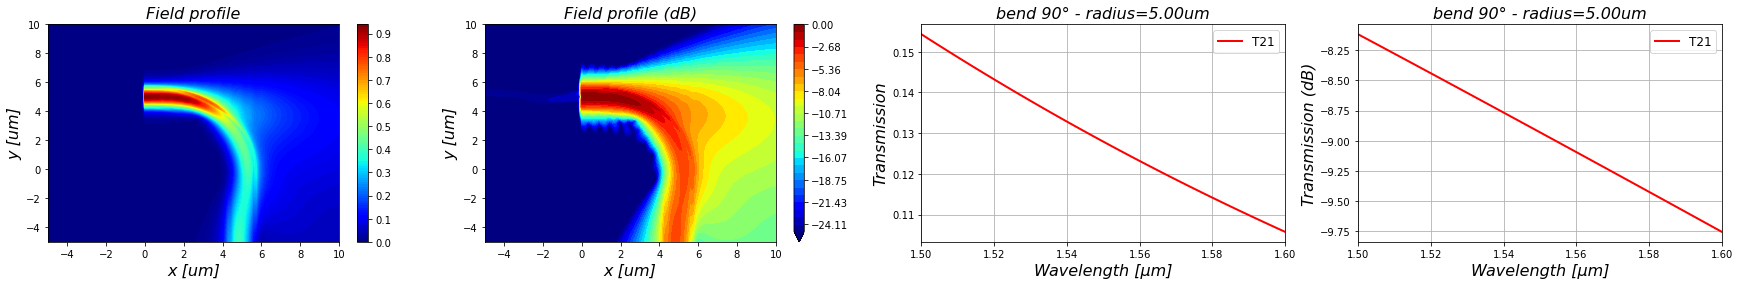

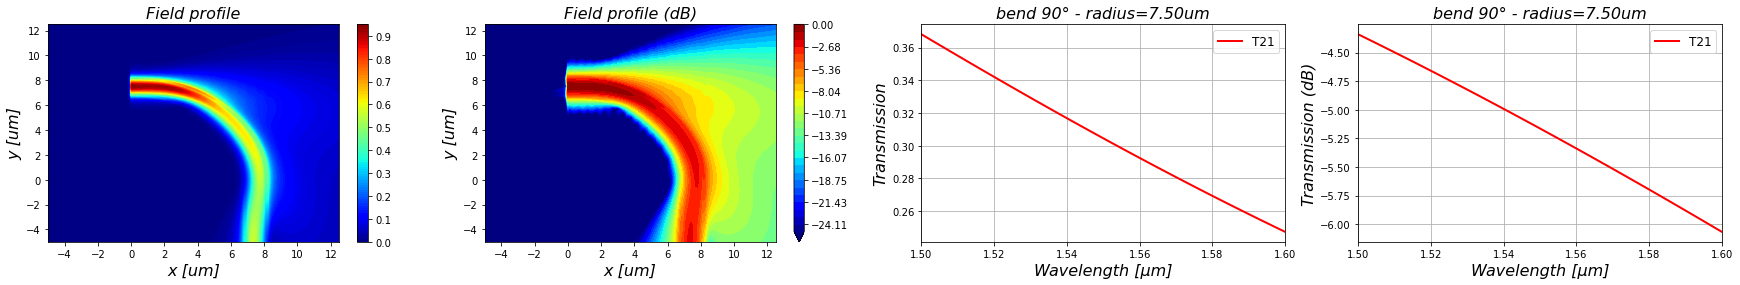

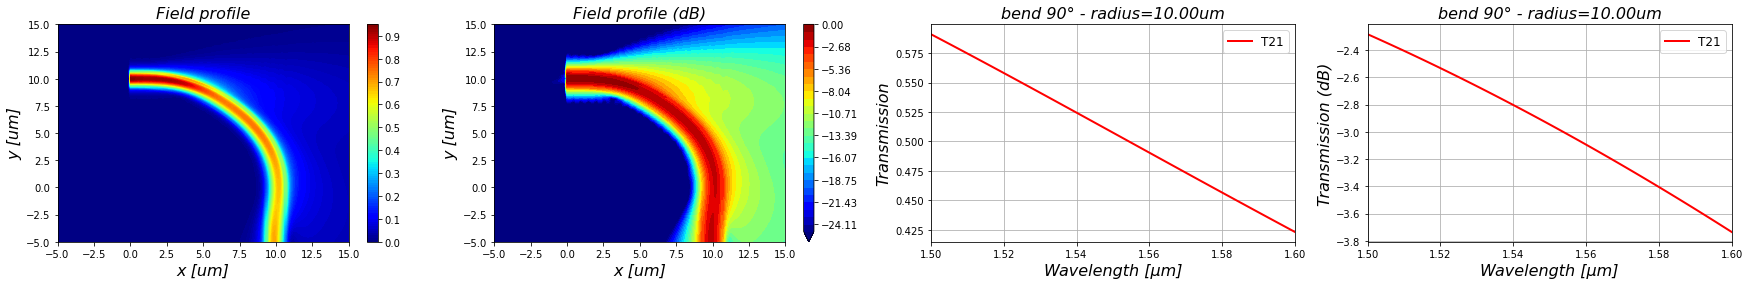

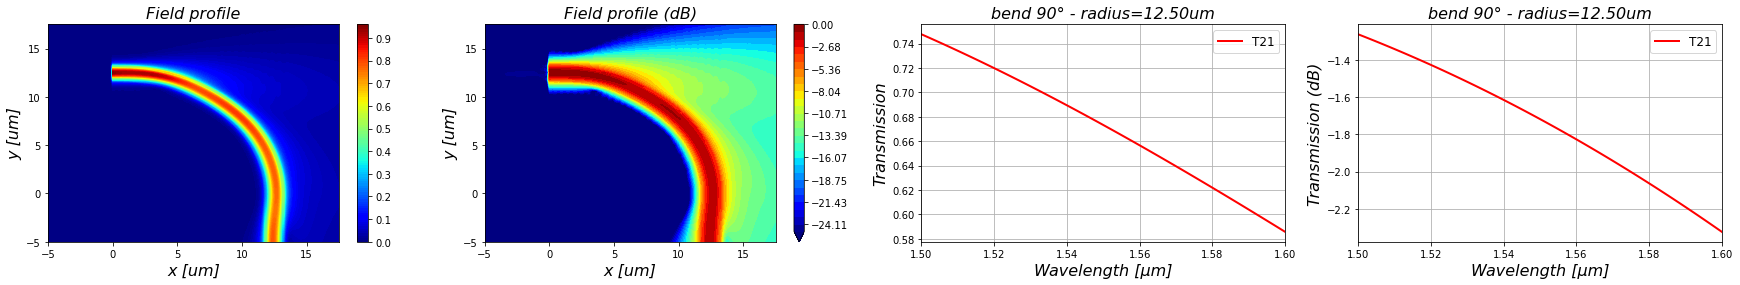

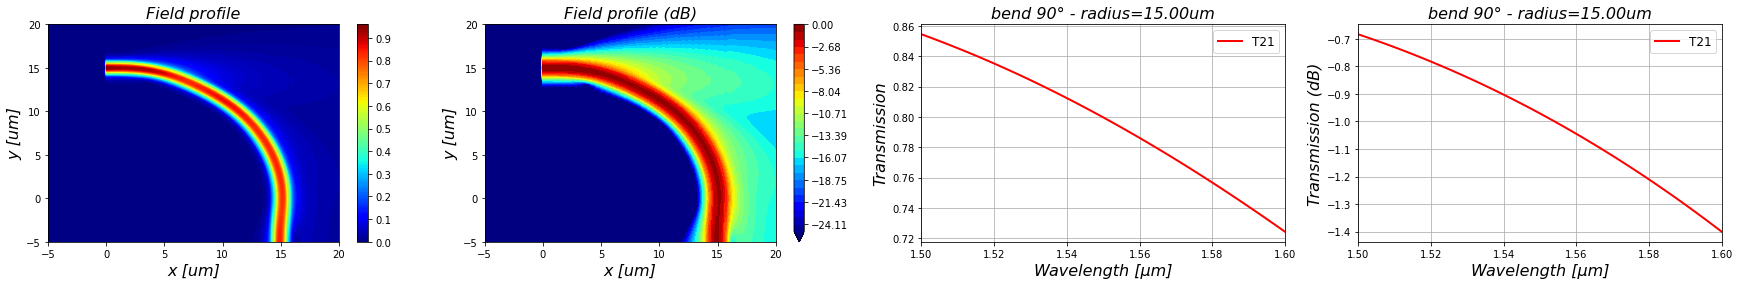

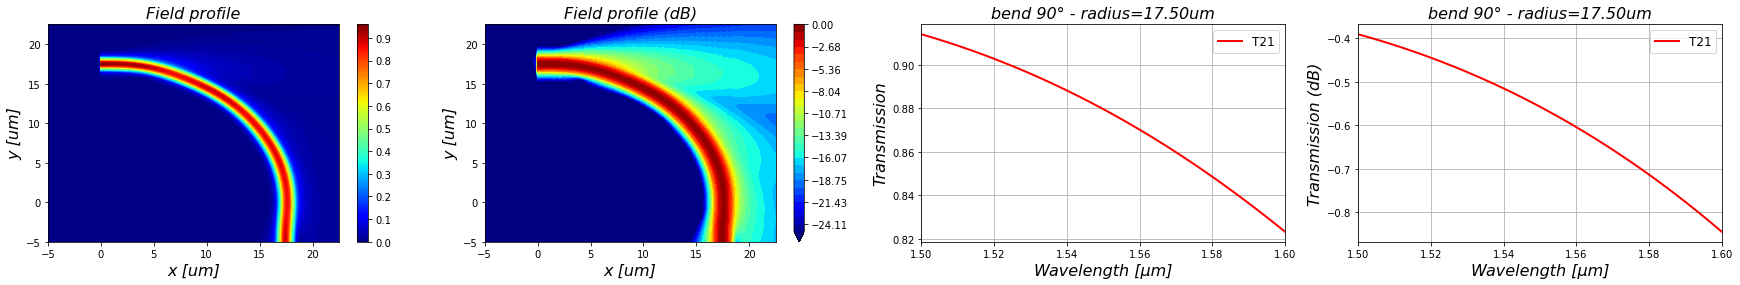

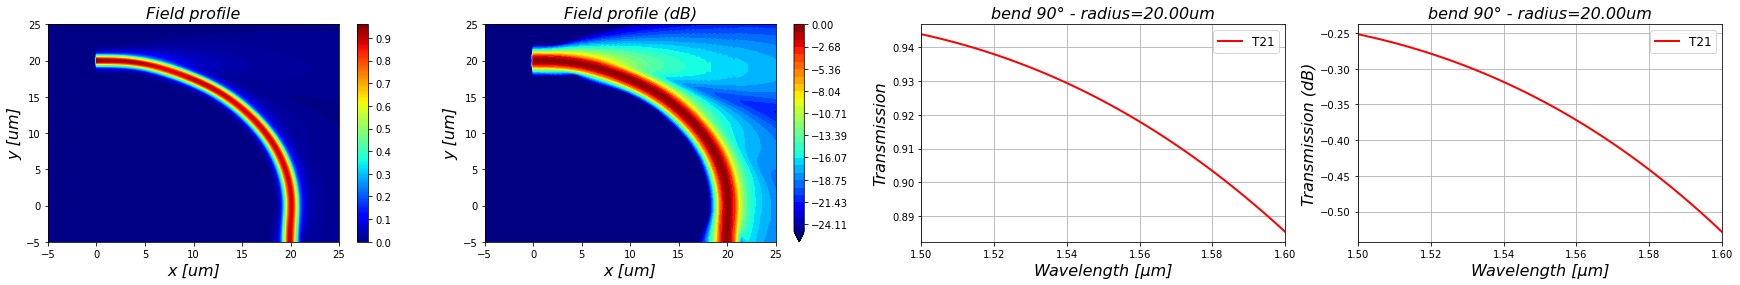

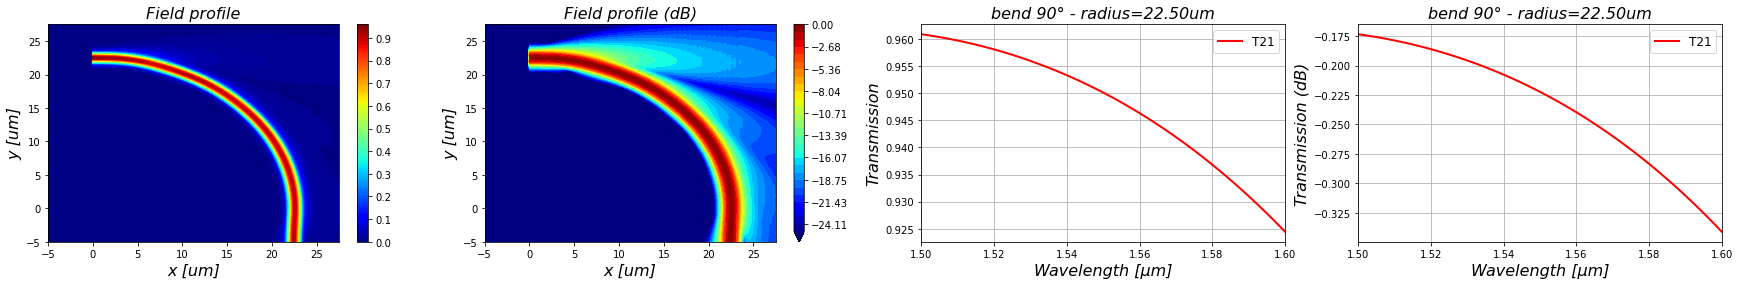

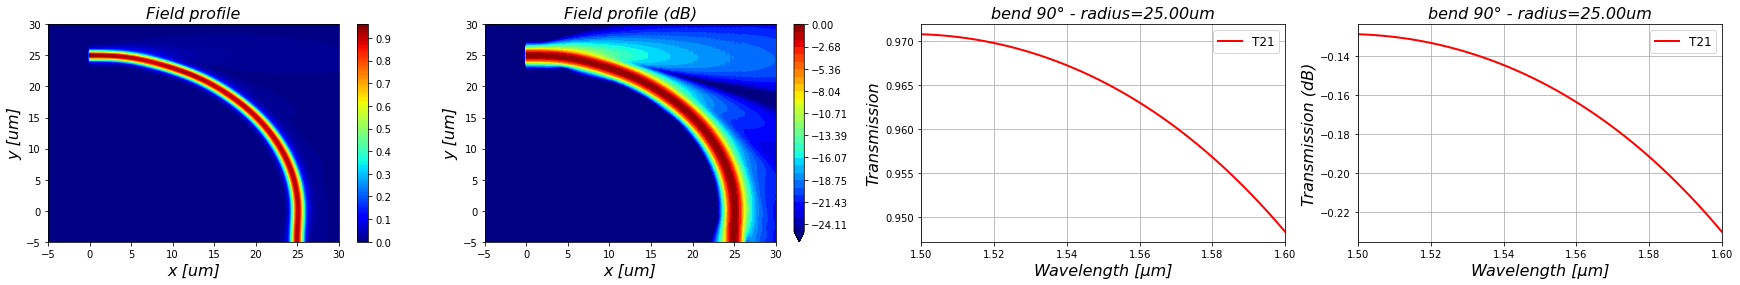

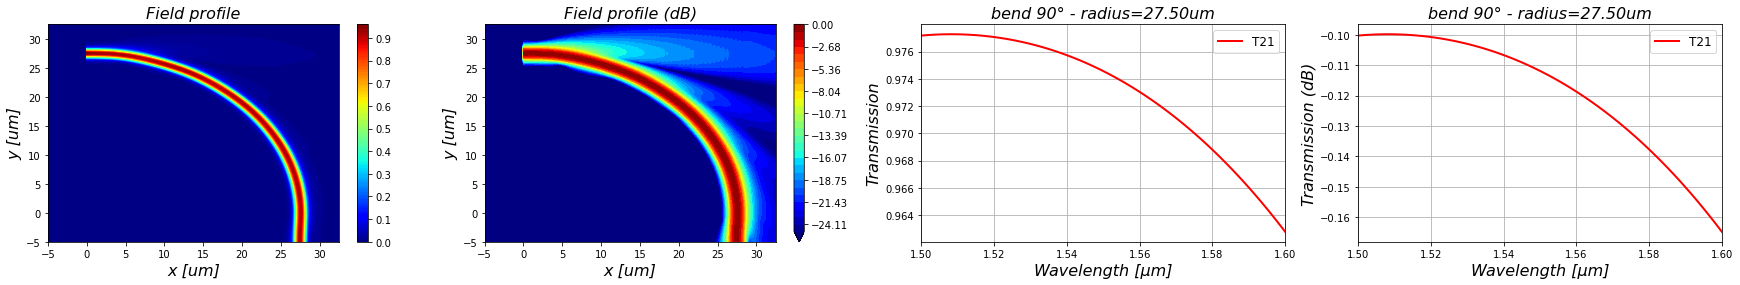

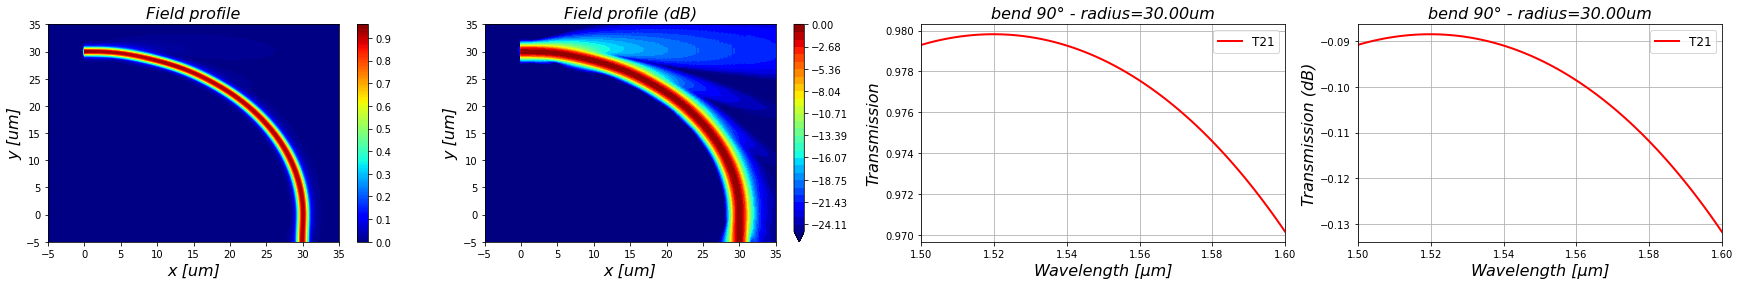

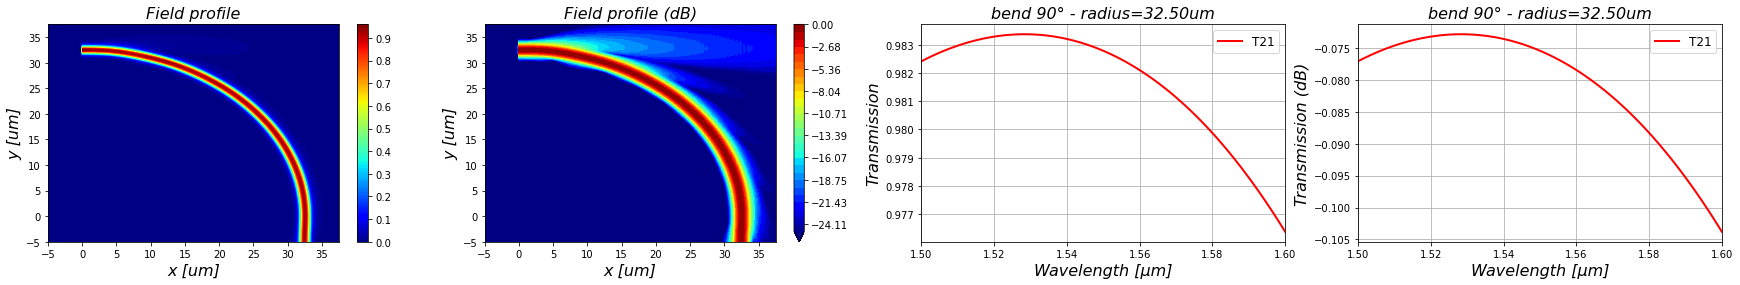

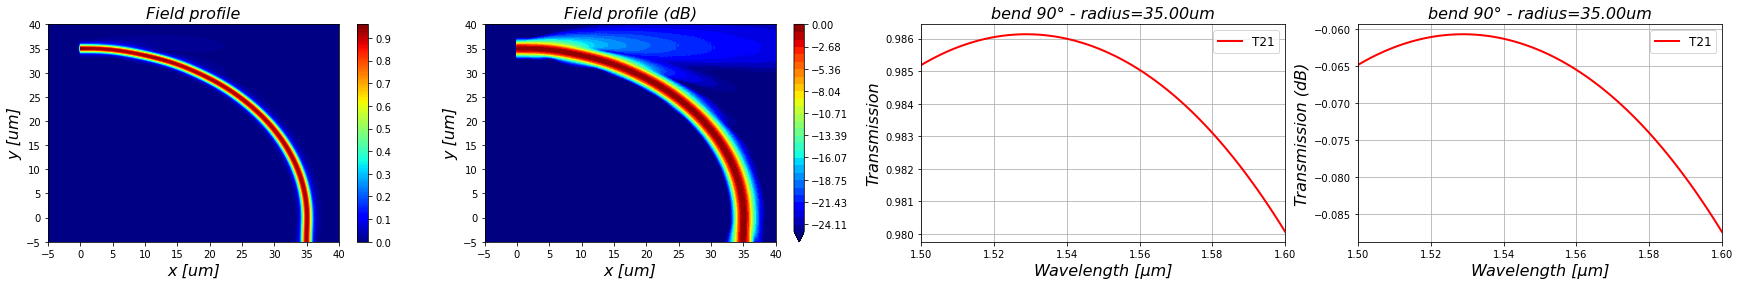

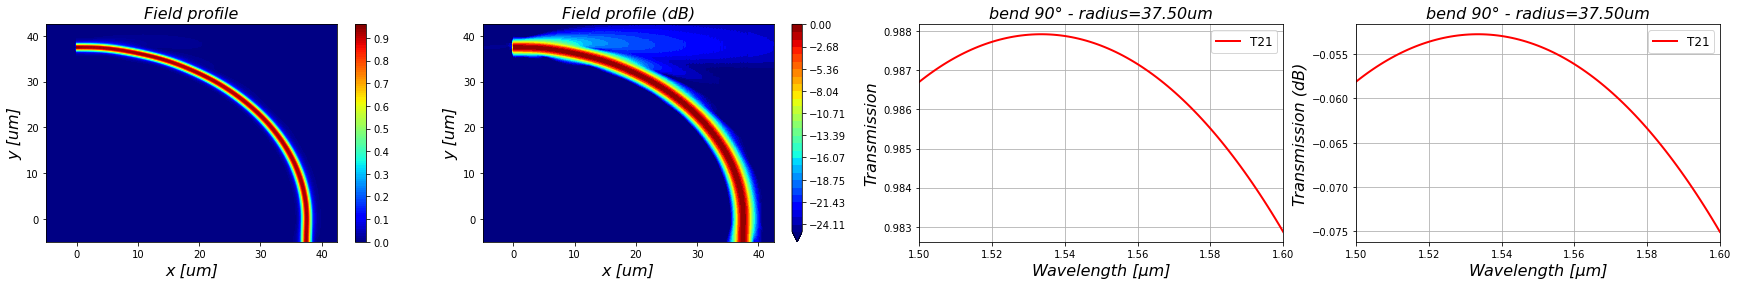

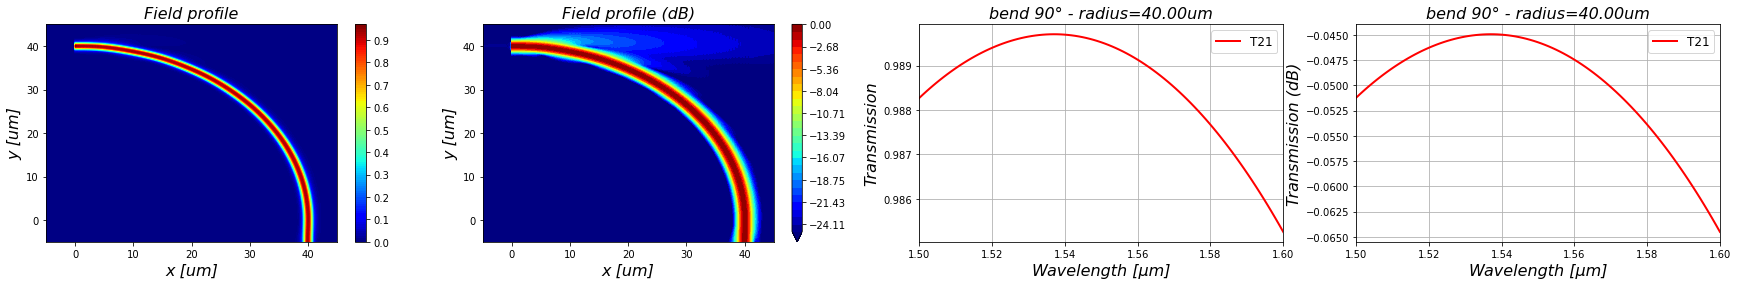

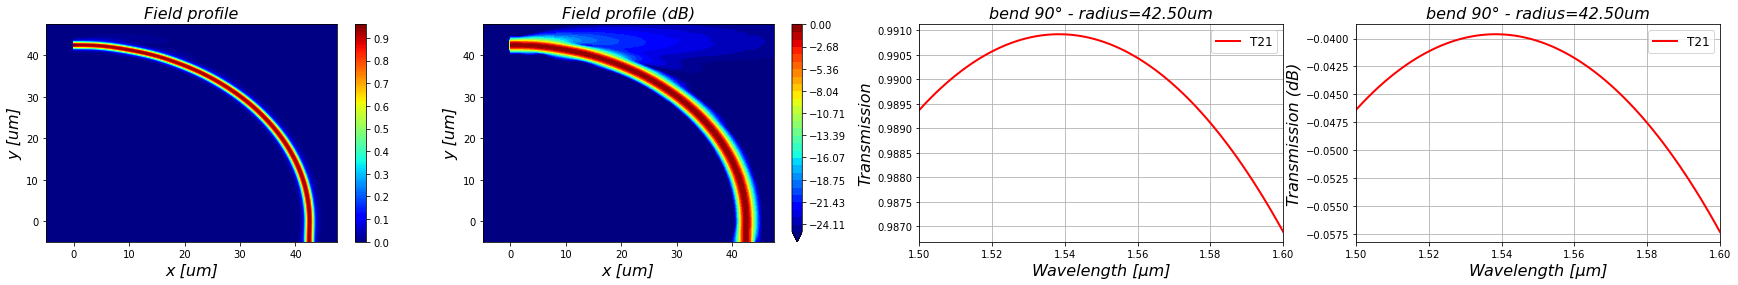

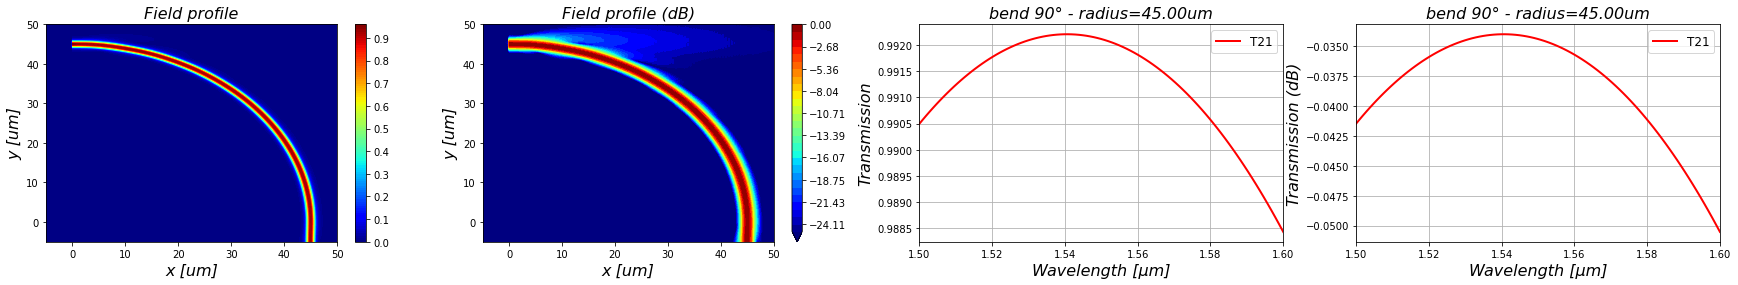

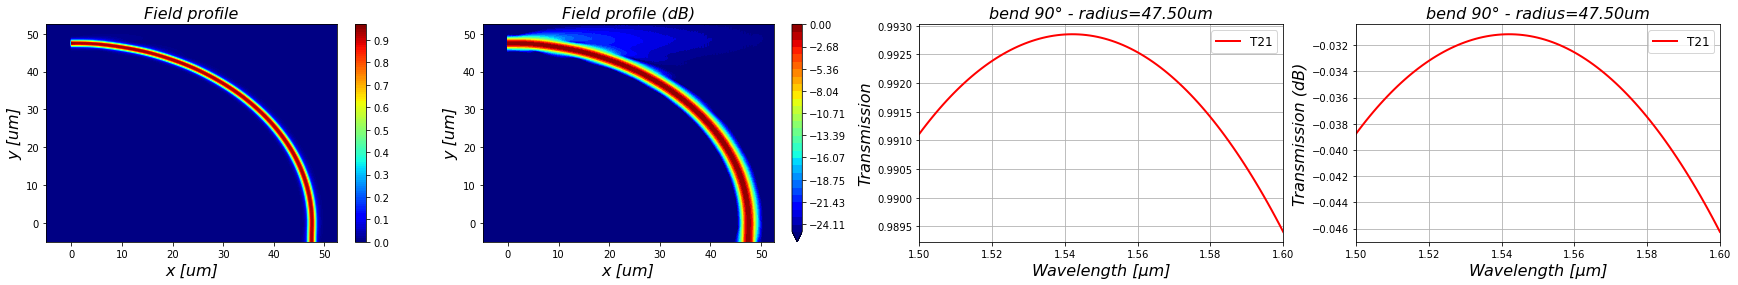

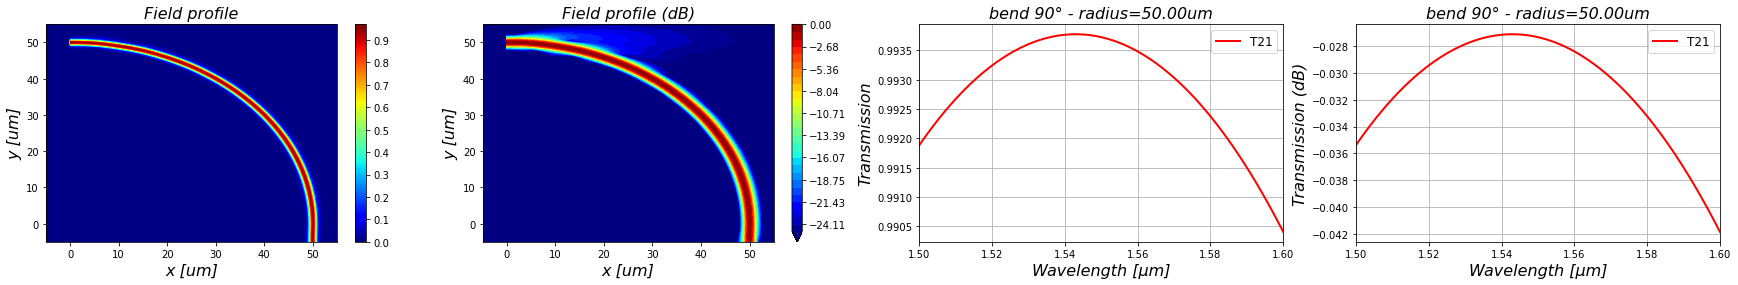

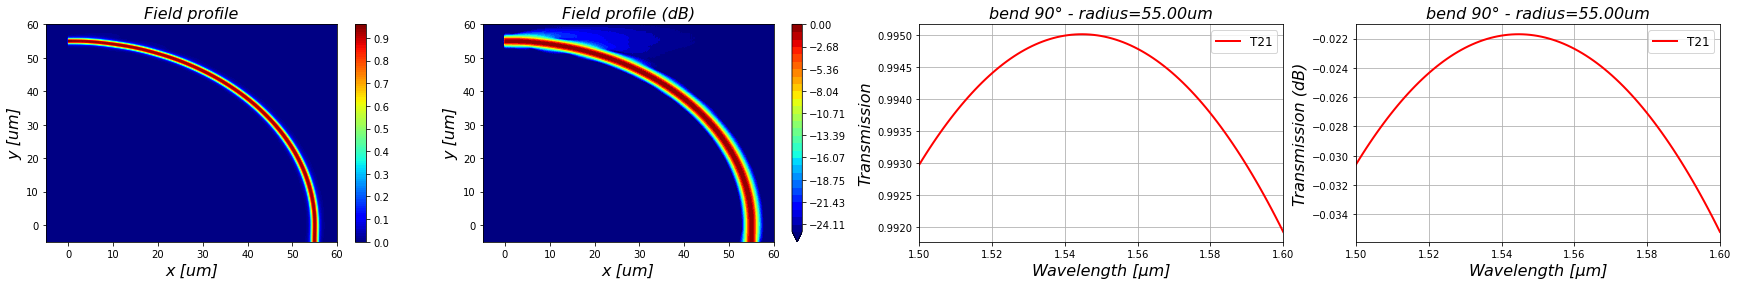

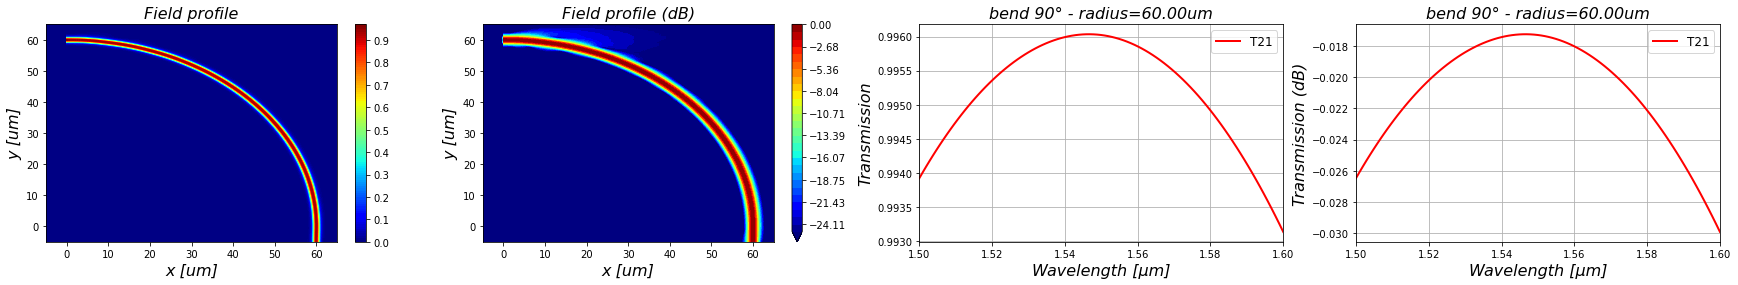

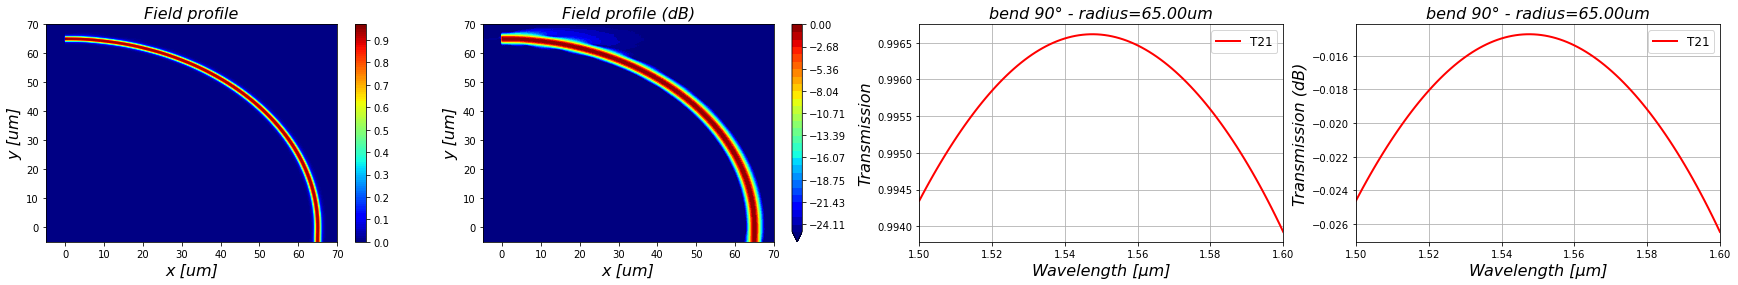

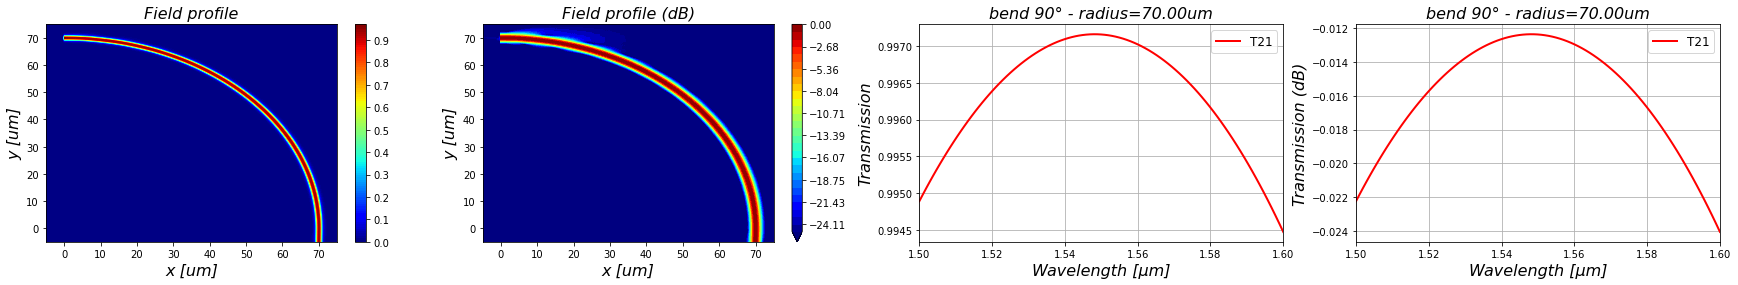

In [3]:
range_raio = np.array([5e-6, 7.5e-6, 10e-6, 12.5e-6, 15e-6, 17.5e-6, 20e-6, 22.5e-6, 25e-6, 27.5e-6, 30e-6, 32.5e-6, 35e-6, 37.5e-6, 40e-6, 42.5e-6, 45e-6, 47.5e-6, 50e-6, 55e-6, 60e-6, 65e-6, 70e-6])

for i in range(len(range_raio)):
    raio = range_raio[i]
    file = "bend90_%0.2f.fsp" %(raio*1e6);
    fdtd  = lumapi.FDTD(file)
    
    E = fdtd.getresult("monitor","E");
    T_p2 = fdtd.getresult("FDTD::ports::port 2", "T");
    
    lambdT = T_p2['lambda']
    T_p2 = np.abs(T_p2['T'])**2
    
    niveis = np.linspace(-25, 0, num = 29);

    lambd = E['lambda'];

    x = E['x']
    x = x[:,0]
    y = E['y']
    y = y[:,0]
    z = E['z']

    E = E['E']

    Ex = E[:,:,0,:,0]
    Ey = E[:,:,0,:,1]
    Ez = E[:,:,0,:,2]
    Emag = np.sqrt(np.abs(Ex)**2 + np.abs(Ey)**2 + np.abs(Ez)**2)
    Emag = Emag/Emag.max()
    logE = 10*np.log10(np.transpose(Emag[:,:,0]))
  
    fig, axs = plt.subplots(1, 4, figsize=(30,4))
    mycmap = plt.get_cmap('jet')

    img1 = axs[0].contourf(1e6*x,1e6*y,np.transpose(Emag[:,:,0]),100,cmap = mycmap);
    fig.colorbar(img1, ax=axs[0])
    axs[0].set_title('Field profile',fontsize = 16,fontstyle = 'oblique')
    axs[0].set_xlabel('x [um]',fontsize = 16, fontstyle = 'oblique')
    axs[0].set_ylabel('y [um]',fontsize = 16, fontstyle = 'oblique')
    
    img2 = axs[1].contourf(1e6*x,1e6*y,logE,100,cmap = mycmap, levels = niveis, extend = 'min')
    fig.colorbar(img2, ax=axs[1])
    axs[1].set_title('Field profile (dB)',fontsize = 16,fontstyle = 'oblique')
    axs[1].set_xlabel('x [um]',fontsize = 16, fontstyle = 'oblique')
    axs[1].set_ylabel('y [um]',fontsize = 16, fontstyle = 'oblique')
    
    axs[2].plot(1e6*lambdT, T_p2, color='red', linewidth=2,label = 'T21');
    axs[2].set_xlim(1.5,1.6)
    axs[2].set_title('bend 90° - radius=%0.2fum' %(raio*1e6), fontsize=16.0, fontstyle='oblique')
    axs[2].set_xlabel('Wavelength [μm]', fontsize=16.0, fontstyle='oblique')
    axs[2].set_ylabel('Transmission', fontsize=16.0, fontstyle='oblique')
    axs[2].legend(loc='upper right', fontsize=12.0)
    axs[2].grid(True)
    
    axs[3].plot(1e6*lambdT, 10*np.log10(T_p2), color='red', linewidth=2,label = 'T21');
    axs[3].set_xlim(1.5,1.6)
    axs[3].set_title('bend 90° - radius=%0.2fum' %(raio*1e6), fontsize=16.0, fontstyle='oblique')
    axs[3].set_xlabel('Wavelength [μm]', fontsize=16.0, fontstyle='oblique')
    axs[3].set_ylabel('Transmission (dB)', fontsize=16.0, fontstyle='oblique')
    axs[3].legend(loc='upper right', fontsize=12.0)
    axs[3].grid(True)
    
    fdtd.close();

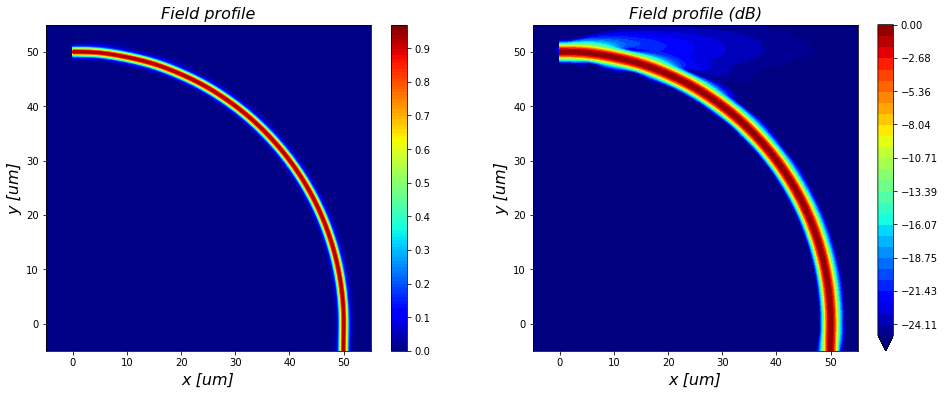

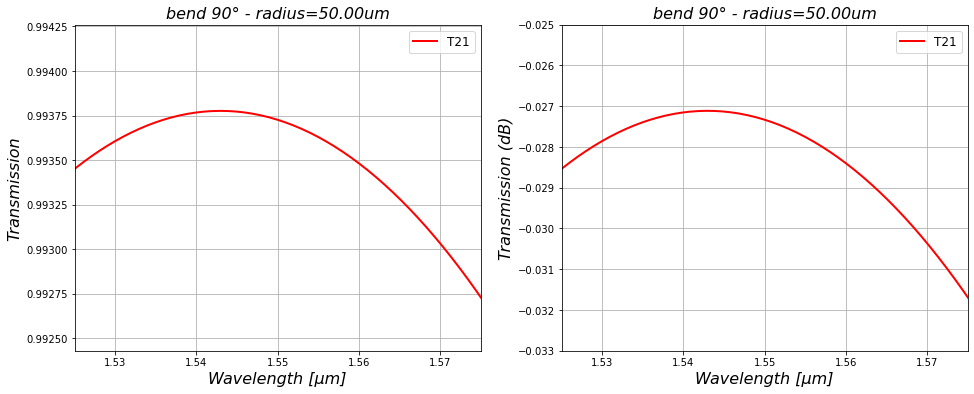

In [8]:
raio = 50e-6
file = "bend90_%0.2f.fsp" %(raio*1e6);
fdtd  = lumapi.FDTD(file)
E = fdtd.getresult("monitor","E");
T_p2 = fdtd.getresult("FDTD::ports::port 2", "T");

lambdT = T_p2['lambda']
T_p2 = np.abs(T_p2['T'])**2

niveis = np.linspace(-25, 0, num = 29);

lambd = E['lambda'];

x = E['x']
x = x[:,0]
y = E['y']
y = y[:,0]
z = E['z']

E = E['E']

Ex = E[:,:,0,:,0]
Ey = E[:,:,0,:,1]
Ez = E[:,:,0,:,2]
Emag = np.sqrt(np.abs(Ex)**2 + np.abs(Ey)**2 + np.abs(Ez)**2)
Emag = Emag/Emag.max()
logE = 10*np.log10(np.transpose(Emag[:,:,0]))

fig, axs = plt.subplots(1, 2, figsize=(16,6))
mycmap = plt.get_cmap('jet')

img1 = axs[0].contourf(1e6*x,1e6*y,np.transpose(Emag[:,:,0]),100,cmap = mycmap);
fig.colorbar(img1, ax=axs[0])
axs[0].set_title('Field profile',fontsize = 16,fontstyle = 'oblique')
axs[0].set_xlabel('x [um]',fontsize = 16, fontstyle = 'oblique')
axs[0].set_ylabel('y [um]',fontsize = 16, fontstyle = 'oblique')

img2 = axs[1].contourf(1e6*x,1e6*y,logE,100,cmap = mycmap, levels = niveis, extend = 'min')
fig.colorbar(img2, ax=axs[1])
axs[1].set_title('Field profile (dB)',fontsize = 16,fontstyle = 'oblique')
axs[1].set_xlabel('x [um]',fontsize = 16, fontstyle = 'oblique')
axs[1].set_ylabel('y [um]',fontsize = 16, fontstyle = 'oblique')

fig, axs = plt.subplots(1, 2, figsize=(16,6))
mycmap = plt.get_cmap('jet')

axs[0].plot(1e6*lambdT, T_p2, color='red', linewidth=2,label = 'T21');
axs[0].set_xlim(1.525,1.575)
axs[0].set_ylim(10**(-0.033/10),10**(-0.025/10))
axs[0].set_title('bend 90° - radius=%0.2fum' %(raio*1e6), fontsize=16.0, fontstyle='oblique')
axs[0].set_xlabel('Wavelength [μm]', fontsize=16.0, fontstyle='oblique')
axs[0].set_ylabel('Transmission', fontsize=16.0, fontstyle='oblique')
axs[0].legend(loc='upper right', fontsize=12.0)
axs[0].grid(True)

axs[1].plot(1e6*lambdT, 10*np.log10(T_p2), color='red', linewidth=2,label = 'T21');
axs[1].set_xlim(1.525,1.575)
axs[1].set_ylim(-0.033, -0.025)
axs[1].set_title('bend 90° - radius=%0.2fum' %(raio*1e6), fontsize=16.0, fontstyle='oblique')
axs[1].set_xlabel('Wavelength [μm]', fontsize=16.0, fontstyle='oblique')
axs[1].set_ylabel('Transmission (dB)', fontsize=16.0, fontstyle='oblique')
axs[1].legend(loc='upper right', fontsize=12.0)
axs[1].grid(True)

fdtd.close();

